# **Setup**

* https://www.youtube.com/watch?v=2Hmt1poZGXo

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

import yfinance as yf
import datetime as dt
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

# **Data Import**

In [5]:
Stock_Name = 'Apple Inc.'
Stock_Symbol = 'AAPL'
Date_Start = '2020-01-01'
Date_End = '2023-12-31'
# Date_End = dt.datetime.now().strftime('%Y-%m-%d')


Stock_Data = yf.download(tickers='AAPL',start=Date_Start,end=Date_End)

print(Stock_Data.shape)
Stock_Data.head(10)

[*********************100%%**********************]  1 of 1 completed

(1006, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925621,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.316772,170108400
2020-01-10,77.650002,78.167503,77.062500,77.582497,75.487038,140644800
2020-01-13,77.910004,79.267502,77.787498,79.239998,77.099762,121532000
2020-01-14,79.175003,79.392502,78.042503,78.169998,76.058678,161954400


# **Data Processing**

In [6]:
Stock_Data.reset_index(inplace=True)
Stock_Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925621,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200


In [7]:
Stock_Data_01 = Stock_Data[['Date','Adj Close']]
Stock_Data_01.head()

,Date,Adj Close
0,2020-01-02,73.059418
1,2020-01-03,72.349129
2,2020-01-06,72.925621
3,2020-01-07,72.582664
4,2020-01-08,73.750244


In [8]:
Stock_Data_01.rename(columns={'Date':'ds','Adj Close':'y'},inplace=True)
Stock_Data_01.head()

,ds,y
0,2020-01-02,73.059418
1,2020-01-03,72.349129
2,2020-01-06,72.925621
3,2020-01-07,72.582664
4,2020-01-08,73.750244


# **Forecasting Model**

## **Create Model**

In [9]:
Model01 = Prophet()
Model01.fit(Stock_Data_01)

12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] done processing


## **Define Forecast Duration**

In [10]:
Stock_Data_Future = Model01.make_future_dataframe(periods=365)
Stock_Data_Future.head(10)

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-06
3,2020-01-07
4,2020-01-08
5,2020-01-09
6,2020-01-10
7,2020-01-13
8,2020-01-14
9,2020-01-15


## **Forecast Data**

In [11]:
Stock_Data_Forecast = Model01.predict(Stock_Data_Future)
Stock_Data_Forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,73.402571,63.857718,81.214176,73.402571,73.402571,-1.159902,-1.159902,-1.159902,0.106030,0.106030,0.106030,-1.265932,-1.265932,-1.265932,0.0,0.0,0.0,72.242669
1,2020-01-03,73.366576,63.053572,79.918922,73.366576,73.366576,-1.416954,-1.416954,-1.416954,0.053747,0.053747,0.053747,-1.470701,-1.470701,-1.470701,0.0,0.0,0.0,71.949622
2,2020-01-06,73.258590,62.384042,80.305734,73.258590,73.258590,-1.730799,-1.730799,-1.730799,0.342138,0.342138,0.342138,-2.072938,-2.072938,-2.072938,0.0,0.0,0.0,71.527791
3,2020-01-07,73.222595,62.302492,79.659638,73.222595,73.222595,-2.051732,-2.051732,-2.051732,0.205008,0.205008,0.205008,-2.256740,-2.256740,-2.256740,0.0,0.0,0.0,71.170862
4,2020-01-08,73.186599,62.379360,79.863446,73.186599,73.186599,-2.136283,-2.136283,-2.136283,0.288895,0.288895,0.288895,-2.425177,-2.425177,-2.425177,0.0,0.0,0.0,71.050317
5,2020-01-09,73.150604,62.041678,79.653728,73.150604,73.150604,-2.468005,-2.468005,-2.468005,0.106030,0.106030,0.106030,-2.574035,-2.574035,-2.574035,0.0,0.0,0.0,70.682599
6,2020-01-10,73.114609,62.332743,79.107025,73.114609,73.114609,-2.645434,-2.645434,-2.645434,0.053747,0.053747,0.053747,-2.699180,-2.699180,-2.699180,0.0,0.0,0.0,70.469175
7,2020-01-13,73.006623,61.797224,78.842116,73.006623,73.006623,-2.552154,-2.552154,-2.552154,0.342138,0.342138,0.342138,-2.894292,-2.894292,-2.894292,0.0,0.0,0.0,70.454469
8,2020-01-14,72.970628,61.399340,79.269573,72.970628,72.970628,-2.683313,-2.683313,-2.683313,0.205008,0.205008,0.205008,-2.888321,-2.888321,-2.888321,0.0,0.0,0.0,70.287315
9,2020-01-15,72.934633,61.253327,78.730538,72.934633,72.934633,-2.553713,-2.553713,-2.553713,0.288895,0.288895,0.288895,-2.842608,-2.842608,-2.842608,0.0,0.0,0.0,70.380919


# **Visualize Forecast Data**

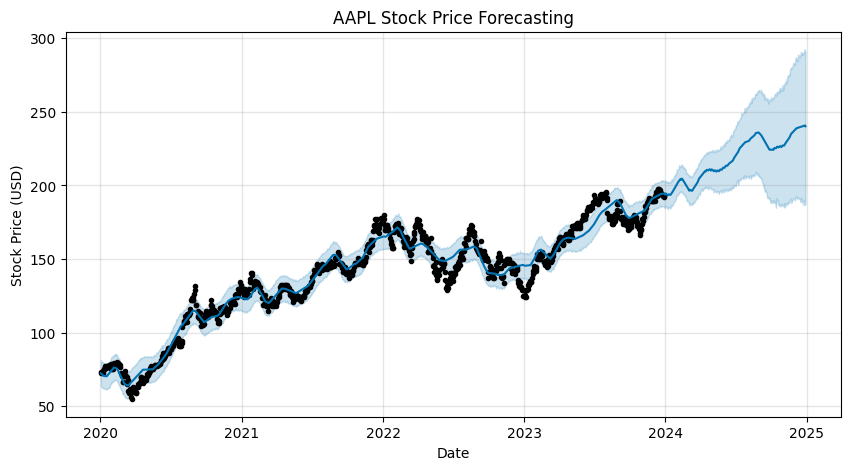

In [17]:
fig,ax = plt.subplots(figsize=(10,5))
Model01.plot(Stock_Data_Forecast,ax=ax)
ax.set_title('AAPL Stock Price Forecasting')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price (USD)')
plt.show()